# 2019.11.24. 딥-러닝 과정 CNN

# 첫번째 실습. Keras 모델 생성/학습 - MNIST : MLP
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

## 1. 데이터 불러오기


In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                               test_size=0.5, 
                                               random_state=123)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(30000, 28, 28) (30000,)
(30000, 28, 28) (30000,)
(10000, 28, 28) (10000,)


## 2. 이미지 데이터 확인하기 🖼


In [3]:
import matplotlib.pyplot as plt

image = X_train[9]

plt.imshow(image, cmap=plt.cm.gray)

## 3-1. 이미지 데이터 전처리 : 2차원 -> 1차원(MLP input) 🌟🌟🌟


In [4]:
X_train = X_train.reshape((X_train.shape[0], 28*28)) # 60000개는 그대로 유지
X_val = X_val.reshape((X_val.shape[0], 28*28))
X_test = X_test.reshape((10000, 28*28))

print(X_train.shape)
print(X_train)

(30000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 3-2. 이미지 데이터 전처리 : Normalzation 
: 가질 수 있는 픽셀 값이 0~255(흰색, 검정색, R, G, B 모두)이므로 수가 너무 커지는 것을 방지

In [5]:
print(X_train[9])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 170 170   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29
  29   0   0   0   0 255 255   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 198 226   0   0   0   0 198 114   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 141 255  57   0   0   0  29 255  86   0   0   0   

In [6]:
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

print(X_train[9])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## 4. Label 전처리 (one-hot encoding) 
: 분류 문제이므로 categorical 해주어야 함

In [7]:
print(y_train[:10])

[2 0 9 6 9 2 3 5 7 4]


In [8]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train[:10])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## 5. 모델 생성 : MLP


In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, 
                input_dim=784,
                activation='relu')) 

model.add(Dense(10, activation='softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# Seq을 생성하는 또 다른 방법
from keras import models

model2 = models.Sequential()

## 6. Compile - Optimizer, Loss function 설정


In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

## 7. 모델 학습시키기


In [12]:
batch_size = 128
epochs = 50

hist = model.fit(X_train, y_train,
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_data=(X_val, y_val),
                 verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 30000 samples, validate on 30000 samples
Epoch 1/50
30000/30000 [==============================] - 2s 57us/step - loss: 1.4445 - acc: 0.6813 - val_loss: 0.9065 - val_acc: 0.8221
Epoch 2/50
30000/30000 [==============================] - 1s 48us/step - loss: 0.7324 - acc: 0.8472 - val_loss: 0.6123 - val_acc: 0.8579
Epoch 3/50
30000/30000 [==============================] - 1s 49us/step - loss: 0.5536 - acc: 0.8696 - val_loss: 0.5062 - val_acc: 0.8747
Epoch 4/50
30000/30000 [==============================] - 1s 47us/step - loss: 0.4751 - acc: 0.8819 - val_loss: 0.4500 - val_acc: 0.8841
Epoch 5/50
30000/30000 [==============================] - 1s 48us/step - loss: 0.4298 - acc: 0.8902 - val_loss: 0.4153 - val_acc: 0.8905
Epoch 6/50
30000/30000 [==============================] - 1s 48us/step - loss: 0.3996 - acc: 0.8948 - val_loss: 0.3903 - val_acc: 0.8959
Epoch 7/50
30000/30000 [==============================] - 1s 48us/step - loss: 0

## 8. 모델 평가하기


In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(test_loss, test_acc)

10000/10000 [==============================] - 0s 29us/step
0.1892718314960599 0.9443


## 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼

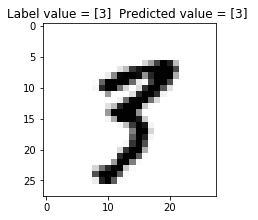

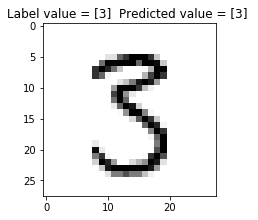

In [14]:
import numpy
for index in numpy.random.choice(len(y_test), 2, replace = False):
    predicted = model.predict(X_test[index:index + 1])[0]
    label = y_test[index]
    result_label = numpy.where(label == numpy.amax(label))
    result_predicted = numpy.where(predicted == numpy.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (result_label[0], result_predicted[0])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = X_test
    plt.imshow(images[index].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()

## 10. 학습 시각화하기


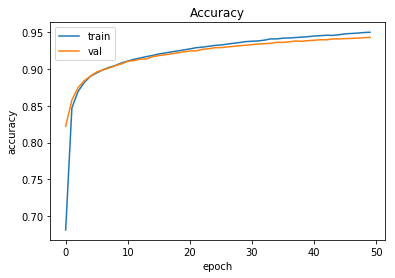

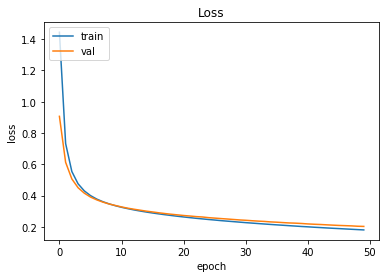

In [15]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'], loc='upper left')
plt.show()